FRAUD TRANSACTIONS PREDICTION USING RANDOM FOREST CLASSIFIER

Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing data from the csv:

In [2]:
data = pd.read_csv('/home/aditya/Downloads/Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Check no. of rows / columns in data

data.shape
print("No of Rows: ", data.shape[0])
print("No of Columns: ", data.shape[1])

No of Rows:  6362620
No of Columns:  11


In [5]:
# Data Type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


-----------

In [6]:
# Check for any null values

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

------------------------------------------------------------------------------------------------------------------

In [7]:
# Checking which 'type' has how many frauds

data.groupby('type')['isFraud'].sum()

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

In [8]:
# Since fraud is mainly by CASH_OUT & TRANSFER, so remove all other type columns from data to prevent 'Noise'
df = data[data['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


----------------------------------------------------------------------------------------------------------------------

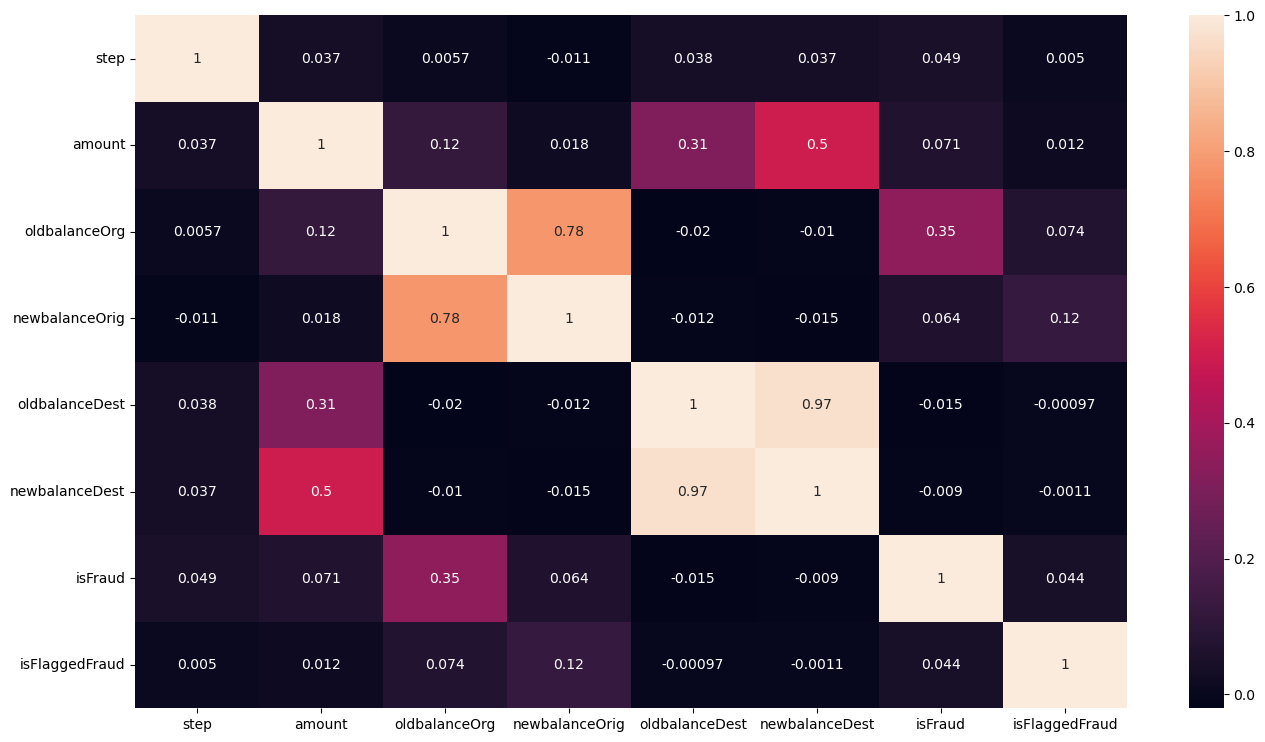

In [9]:
# Check Redundant columns

num_col = ['step', 'amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

corr_matrix = df[num_col].corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True)
plt.show()


--------------------------

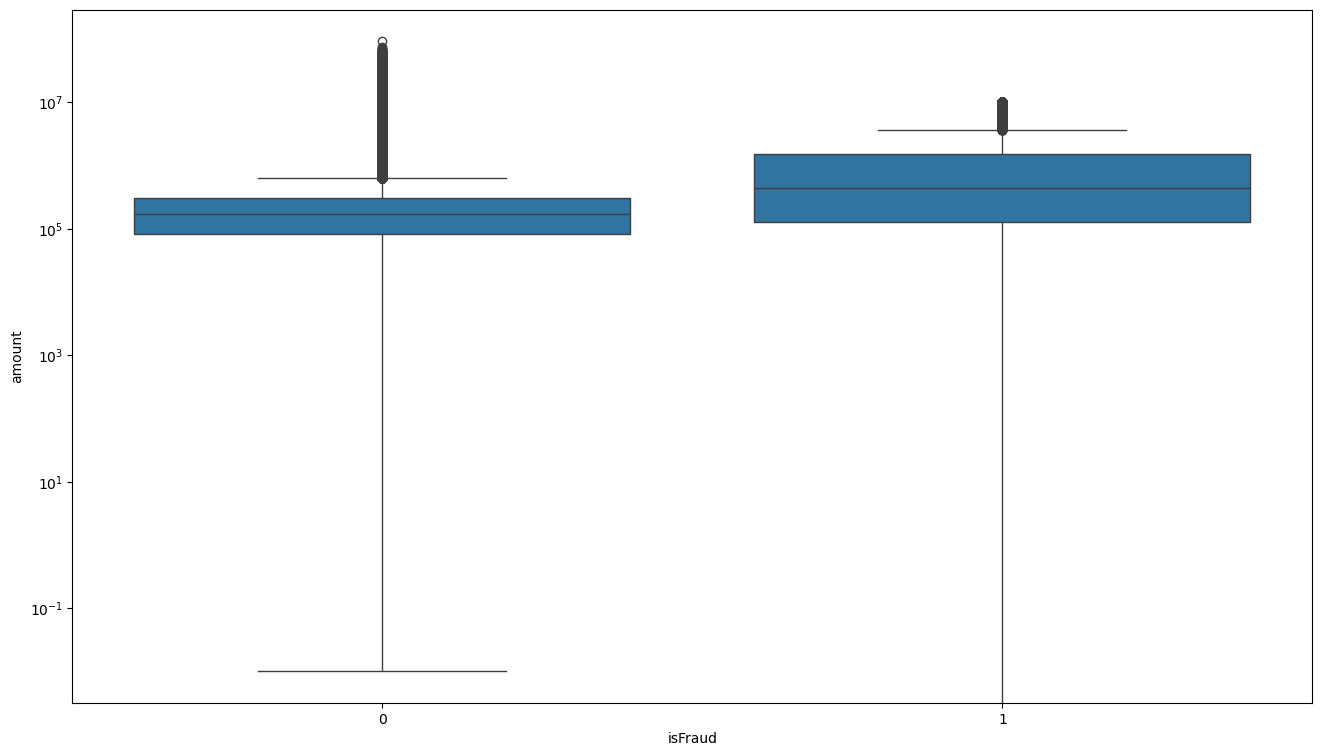

             count          mean           std   min          25%        50%  \
isFraud                                                                        
0        2762196.0  3.141155e+05  8.771441e+05  0.01   82908.2325  171034.46   
1           8213.0  1.467967e+06  2.404253e+06  0.00  127091.3300  441423.44   

                 75%          max  
isFraud                            
0         305994.185  92445516.64  
1        1517771.480  10000000.00  


In [10]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.yscale('log')
plt.show()

print(df.groupby('isFraud')['amount'].describe())

In [11]:
# Dropping columns that aren't useful for basic ML patterns
# isFlaggedFraud is also dropped because it is a result of a simple rule, not a predictor
df_cleaned = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

print("Columns remaining")
print(df_cleaned.columns.tolist())

Columns remaining
['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [12]:
# 1. Feature Engineering: Calculating discrepancies in balances
# Error in Origin: Balance should decrease by exactly the 'amount'
df_cleaned['errorBalanceOrig'] = df_cleaned['oldbalanceOrg'] - df_cleaned['amount'] - df_cleaned['newbalanceOrig']

# Error in Destination: Balance should increase by exactly the 'amount'
df_cleaned['errorBalanceDest'] = df_cleaned['oldbalanceDest'] + df_cleaned['amount'] - df_cleaned['newbalanceDest']

# Check the results
print("Sample of newly created features:")
print(df_cleaned[['amount', 'errorBalanceOrig', 'errorBalanceDest']].head())

Sample of newly created features:
       amount  errorBalanceOrig  errorBalanceDest
2      181.00              0.00             181.0
3      181.00              0.00           21363.0
15  229133.94        -213808.94          182703.5
19  215310.30        -214605.30          237735.3
24  311685.89        -300850.89        -2401220.0


In [13]:
# 2. Encoding: Converting 'type' into numerical columns
# We use drop_first=True to avoid the 'dummy variable trap' (multi-collinearity)
df_final = pd.get_dummies(df_cleaned, columns=['type'], drop_first=True)

# Visual check of the final dataframe structure
print("\nFinal Columns after Encoding:")
print(df_final.columns.tolist())
df_final.head()


Final Columns after Encoding:
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'errorBalanceOrig', 'errorBalanceDest', 'type_TRANSFER']


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,True
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,False
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,-213808.94,182703.5,False
19,1,215310.30,705.0,0.0,22425.0,0.00,0,-214605.30,237735.3,True
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,-300850.89,-2401220.0,True


In [14]:
# 3. Splitting: Separating features from the target variable
X = df_final.drop(['isFraud'], axis=1)
y = df_final['isFraud']

print(f"Total features to be used: {X.shape[1]}")

Total features to be used: 9


In [15]:
from sklearn.model_selection import train_test_split

# Train-Test Split (80% Train, 20% Test)
# random_state=42 ensures the results are reproducible
# stratify=y keeps the 0.13% fraud ratio consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print("\nFraud cases in Training set:")
print(y_train.value_counts())

Training set size: (2216327, 9)
Testing set size: (554082, 9)

Fraud cases in Training set:
isFraud
0    2209757
1       6570
Name: count, dtype: int64


In [16]:
from sklearn.ensemble import RandomForestClassifier

#  Initialize the Random Forest
# n_estimators=100: 100 trees banayenge accuracy ke liye
# class_weight='balanced' Ye model ko bolega ki Fraud (1) par zyada dhyan de
# max_depth=10: Trees ko bahut lamba nahi hone denge taaki memory bache
# n_jobs=-1: computer ke saare cores use karega speed badhane ke liye

rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  class_weight='balanced', 
                                  n_jobs=-1, 
                                  random_state=42)

# 2. Train the model
print("Training started... please wait.")
rf_model.fit(X_train, y_train)
print("Model training completed!")

Training started... please wait.
Model training completed!


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       1.00      1.00      1.00      1643

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



<Figure size 800x600 with 0 Axes>

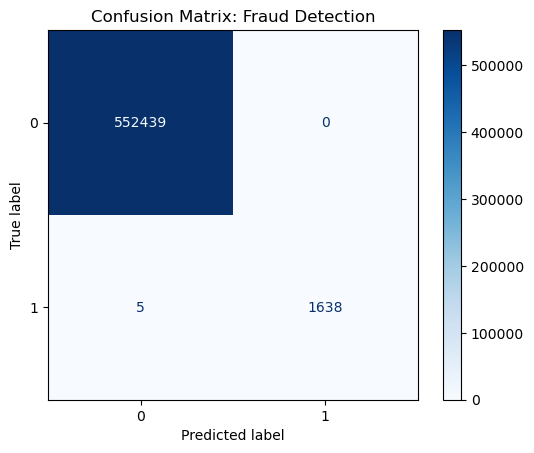

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 3. Predict on Test data
y_pred = rf_model.predict(X_test)

# 4. Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Fraud Detection")
plt.show()

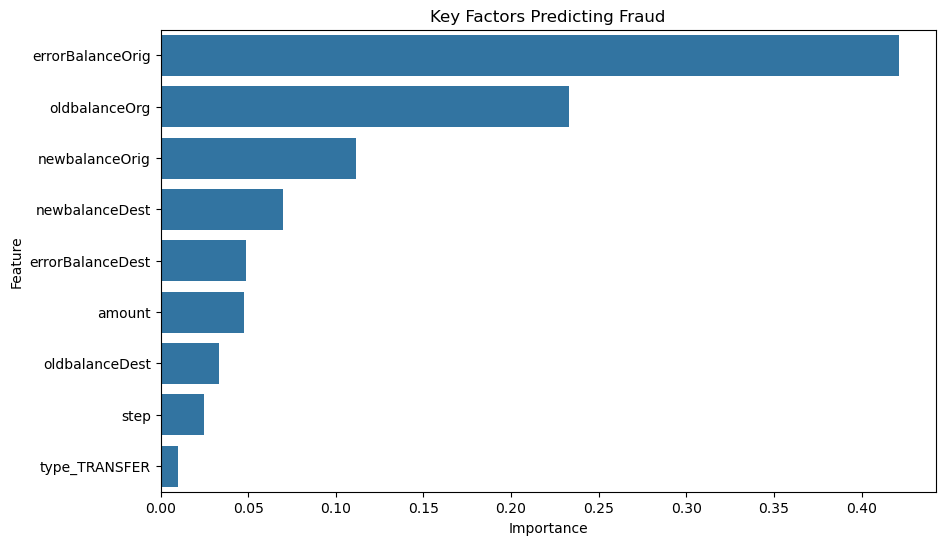

Top 5 Key Factors:
            Feature  Importance
6  errorBalanceOrig    0.421057
2     oldbalanceOrg    0.233222
3    newbalanceOrig    0.111529
5    newbalanceDest    0.069641
7  errorBalanceDest    0.048555


In [18]:
# 6. Identifying Key Factors
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Key Factors Predicting Fraud")
plt.show()

print("Top 5 Key Factors:")
print(feature_importance_df.head(5))